# Read The Data

In [1]:
import numpy as np 
import pandas as pd 
import holidays

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Önemli Scriptler')

In [2]:
data = pd.read_csv('train.csv' , parse_dates=['Tarih'] )
submit = pd.read_csv('sample_submission.csv', parse_dates=['Tarih'])
med = pd.read_csv('med.csv' , parse_dates=['Tarih'])


calendar = pd.read_csv('Turkish_calendar.csv',sep=(";"))

# Feature Engineering

In [3]:
from feat_engs import create_time_features1 , create_time_features2

data , submit = create_time_features1(data , med , calendar ,submit)
# data = create_time_features2(data , med)
# submit = create_time_features2(submit , med)

data

,Tarih,Dağıtılan Enerji (MWh),Yıl,Ay,Gün,Saat,Kesintili Günler,Quarter,day_of_week,day_of_year,week_of_year,CALENDAR_DATE,Haftanın Günü,Sezon,Haftasonu - Haftaiçi,Yılın kaçıncı haftası,Ramazan,Dini Gün,Ulusal Gün,Resmi tatil
0,2018-01-01 00:00:00,1593.944216,2018,1,1,0,0.0,1,0,1,1,1.01.2018,1,1,0,1,0,100,206,1
1,2018-01-01 01:00:00,1513.933887,2018,1,1,1,0.0,1,0,1,1,1.01.2018,1,1,0,1,0,100,206,1
2,2018-01-01 02:00:00,1402.612637,2018,1,1,2,0.0,1,0,1,1,1.01.2018,1,1,0,1,0,100,206,1
3,2018-01-01 03:00:00,1278.527266,2018,1,1,3,0.0,1,0,1,1,1.01.2018,1,1,0,1,0,100,206,1
4,2018-01-01 04:00:00,1220.697701,2018,1,1,4,0.0,1,0,1,1,1.01.2018,1,1,0,1,0,100,206,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40147,2022-07-31 19:00:00,2492.489498,2022,7,31,19,0.0,3,6,212,30,31.07.2022,7,3,1,32,0,100,200,1
40148,2022-07-31 20:00:00,2479.958245,2022,7,31,20,0.0,3,6,212,30,31.07.2022,7,3,1,32,0,100,200,1
40149,2022-07-31 21:00:00,2485.016884,2022,7,31,21,0.0,3,6,212,30,31.07.2022,7,3,1,32,0,100,200,1
40150,2022-07-31 22:00:00,2396.574255,2022,7,31,22,0.0,3,6,212,30,31.07.2022,7,3,1,32,0,100,200,1


<Axes: >

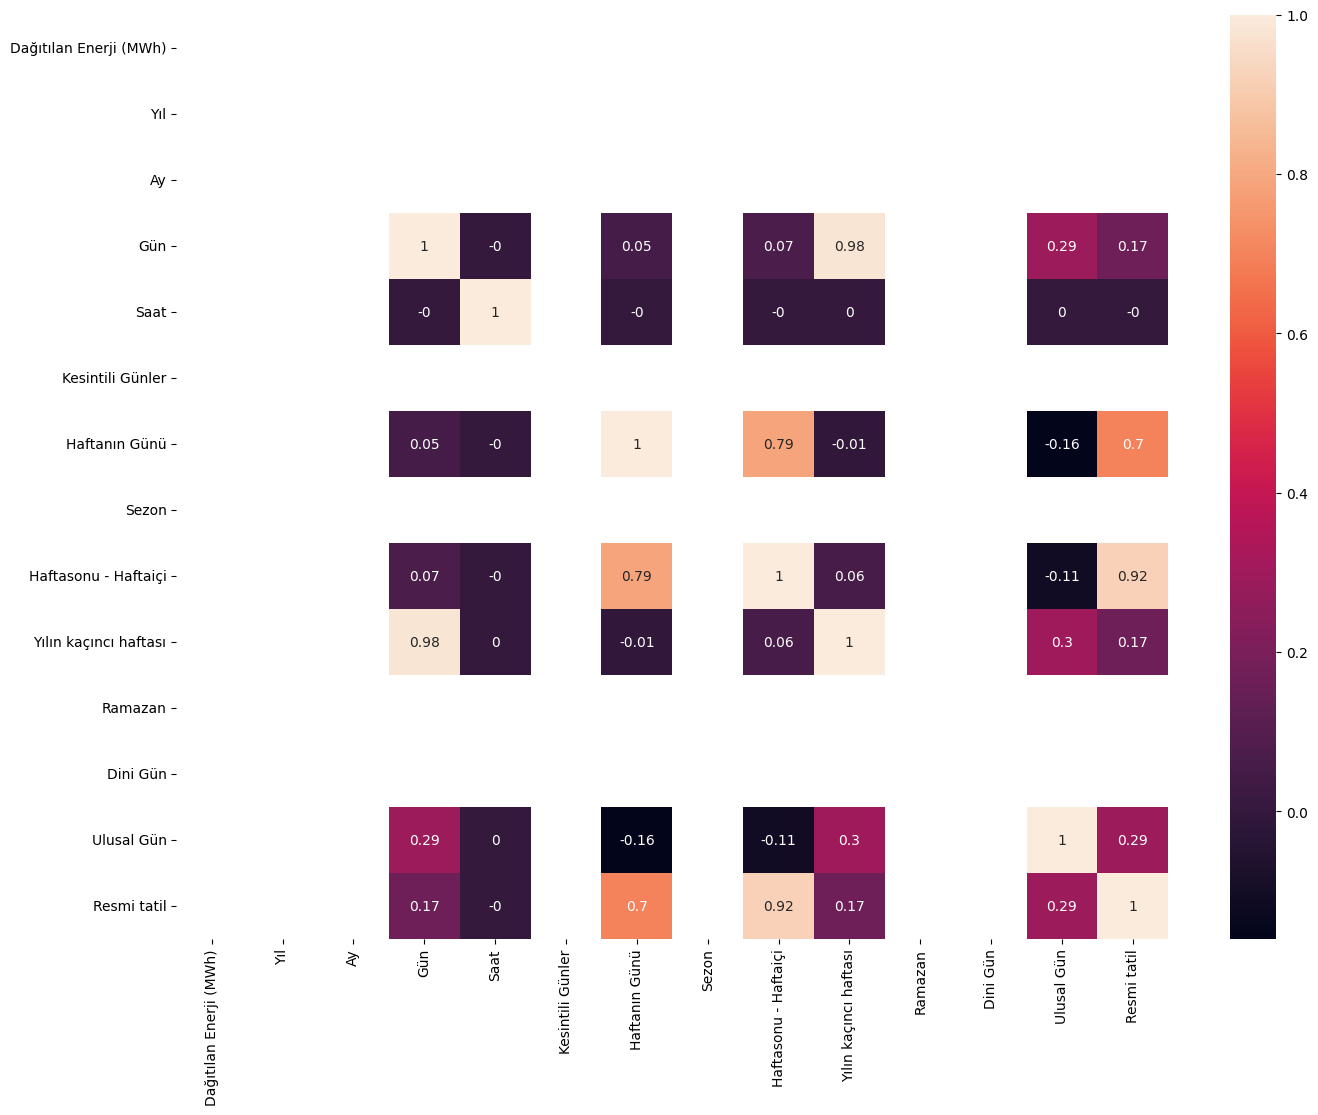

In [4]:
plt.figure(figsize = (16,12) , dpi=100)
sns.heatmap(submit.corr(numeric_only=True).round(2) , annot = True)

<Axes: >

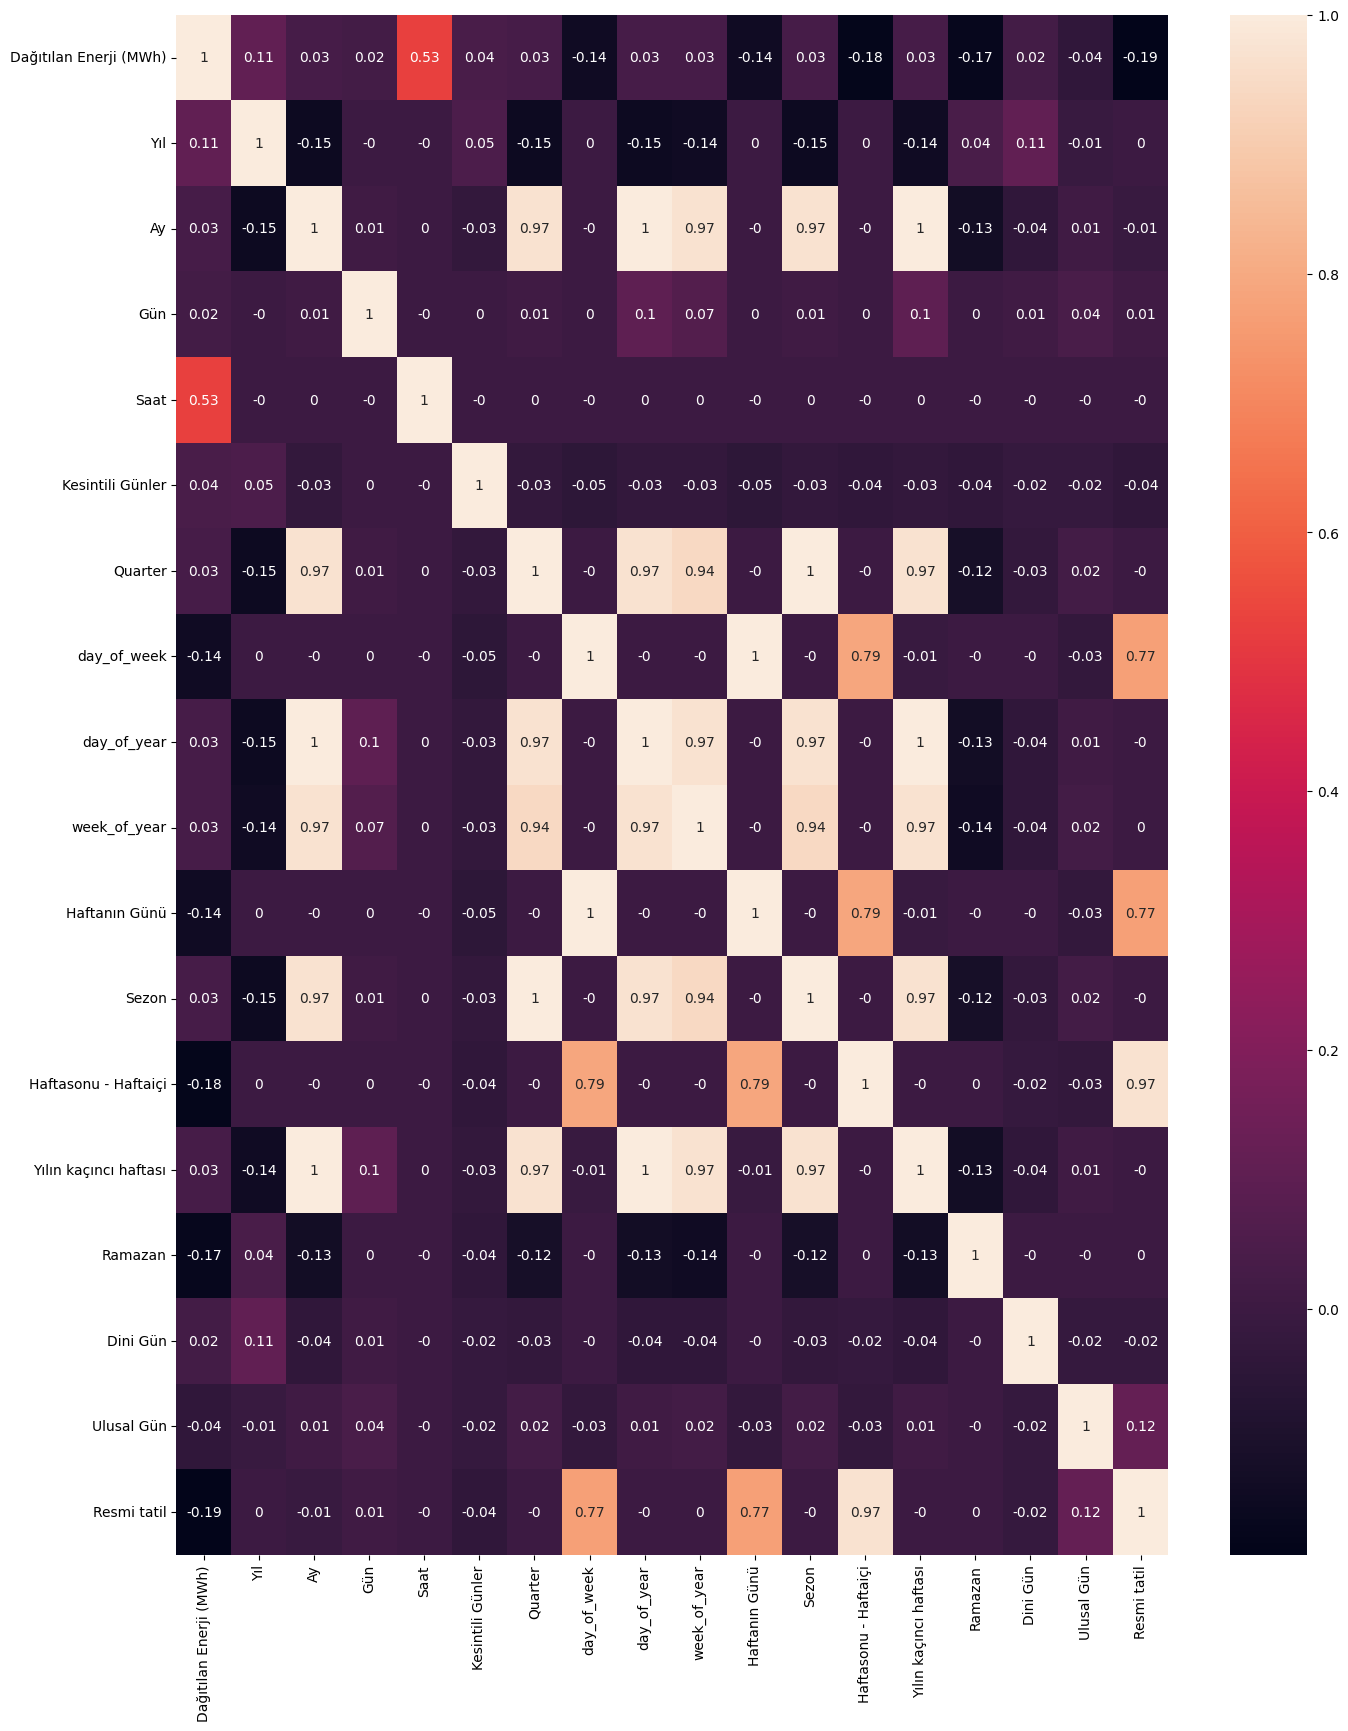

In [5]:
plt.figure(figsize = (16,20) , dpi=100)
sns.heatmap(data.corr(numeric_only=True).round(2) , annot = True)

In [6]:
# data.drop(['electrical_outage' , 'outage_percentage' , 'rolling_outages_24h' , 'exp_avg_outages_24h'] , axis = 1 , inplace=True)
# submit.drop(['electrical_outage' , 'outage_percentage' , 'rolling_outages_24h' , 'exp_avg_outages_24h'] , axis = 1 , inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40152 entries, 0 to 40151
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tarih                   40152 non-null  datetime64[ns]
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64       
 2   Yıl                     40152 non-null  int64         
 3   Ay                      40152 non-null  int64         
 4   Gün                     40152 non-null  int64         
 5   Saat                    40152 non-null  int64         
 6   Kesintili Günler        40152 non-null  float64       
 7   Quarter                 40152 non-null  int64         
 8   day_of_week             40152 non-null  int64         
 9   day_of_year             40152 non-null  int64         
 10  week_of_year            40152 non-null  UInt32        
 11  CALENDAR_DATE           40152 non-null  object        
 12  Haftanın Günü           40152 non-null  int64 

# Train | Test Split

In [14]:
# data.set_index('Tarih' , inplace=True)
# submit.set_index('Tarih' , inplace=True)

data['week_of_year'] = data['week_of_year'].astype('int')
# submit['week_of_year'] = submit['week_of_year'].astype('int')

In [15]:
X=data.drop("Dağıtılan Enerji (MWh)", axis=1)
y=data["Dağıtılan Enerji (MWh)"]
# forecast=submit.drop("Dağıtılan Enerji (MWh)", axis=1)
forecast = submit.copy()
forecast.drop("Dağıtılan Enerji (MWh)", axis = 1 , inplace = True)

In [16]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from eval_metrics import eval_metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=53 , shuffle=False)

# Modelling

# Randomized Search XGB

In [ ]:
# from xgboost import XGBRegressor
# import scipy
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer, mean_absolute_percentage_error

# base_model = XGBRegressor(tree_method = 'gpu_hist')

# # params = {
# #     'n_estimators' : np.arange(100,3000,100),
# #     'learning_rate': scipy.stats.uniform(0.01, 0.1),
# #     'max_depth': scipy.stats.randint(3, 10),
# #     'min_child_weight': scipy.stats.randint(1, 6),
# #     'subsample': scipy.stats.uniform(0.1, 0.9),
# #     'colsample_bytree': scipy.stats.uniform(0.1, 0.9),
# #     'gamma': scipy.stats.uniform(0, 0.5),
# #     'reg_alpha': scipy.stats.uniform(0, 1),
# #     'reg_lambda': scipy.stats.uniform(0, 1)
# # }

# params = {
#     'n_estimators' : np.arange(1000,4000,100),
#     'learning_rate': np.arange(0.01, 0.5, 0.01),
#     'max_depth': np.arange(2, 20),
#     'min_child_weight': np.arange(1,7),
#     'subsample': np.arange(0.1,1,0.1),
#     'colsample_bytree': np.arange(0.1,1, 0.1),
#     'gamma': np.arange(0.1,0.6,0.1),
#     # 'reg_alpha': scipy.stats.uniform(0, 1),
#     # 'reg_lambda': scipy.stats.uniform(0, 1)
# }

# random_search = RandomizedSearchCV(base_model, param_distributions= params, n_iter= 200, cv= 3, scoring= 'neg_mean_absolute_percentage_error' , random_state= 53)
# random_search.fit(X_train , y_train)

# print(f"""
#       En iyi XGB parametreleri : {random_search.best_params_}
#       En iyi mape skorumuz : {-random_search.best_score_}
#       """)

# Modelling Time

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

In [18]:
from eval_metrics import eval_metrics

In [22]:
X_train.drop('CALENDAR_DATE' , axis = 1 , inplace = True)
X_test.drop('CALENDAR_DATE' , axis = 1 , inplace = True)

In [30]:
xgb_deneme = XGBRegressor(tree_method='gpu_hist' , n_estimators=800 , max_depth = 20 , learning_rate = 0.4 , gamma= 0.4 , colsample_bytree = 0.9 , subsample=0.9 , min_child_weight= 2)

xgb_deneme.fit(X_train,y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgb_deneme.predict(X_test)

# Hata ölçeğini MAPE olarak hesaplama
mape = mean_absolute_percentage_error(y_test, y_pred)

# MAPE değerini yazdırma
eval_metrics(y_test, y_pred)


          Mape Score : 0.07782645636147527
          R2 Score : 0.7613478866462104
          MAE Score : 148.03744781685174
          MSE Score : 199.34563333124913
          


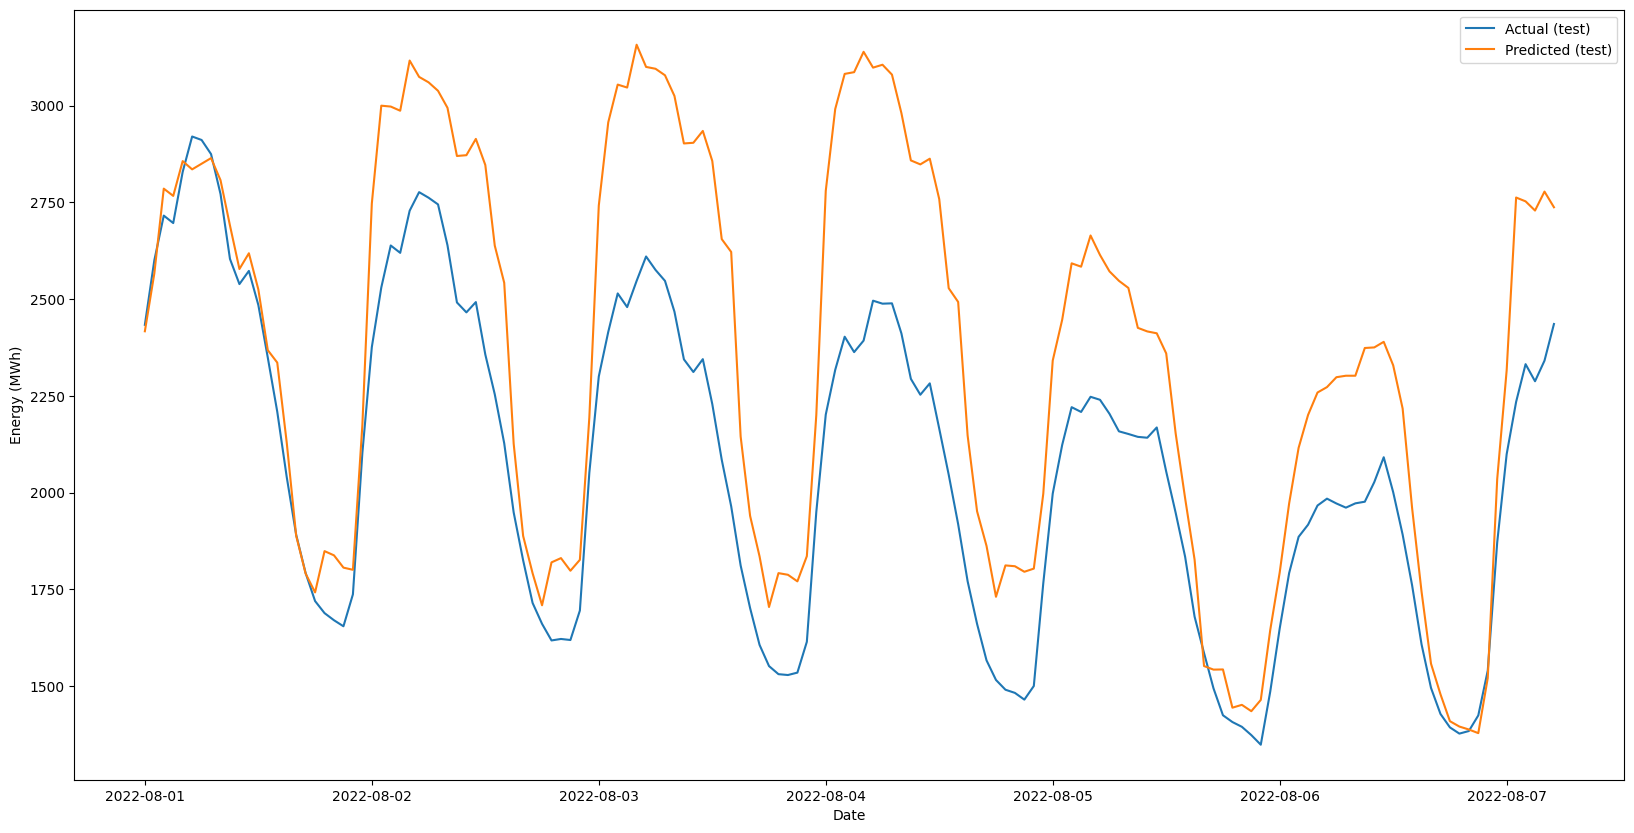

In [31]:
fig = plt.figure(figsize=(20, 10))
# Tahminleri ve gerçek değerleri görselleştir
plt.plot(forecast.index[:150], y_test[:150], label='Actual (test)')
plt.plot(forecast.index[:150], y_pred[:150], label='Predicted (test)')

plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.legend()
plt.show()

# Final Model 

In [ ]:
xgb_final = XGBRegressor(tree_method='gpu_hist' , n_estimators=1000 , max_depth = 4 , learning_rate = 0.05 , gamma= 0.2 , colsample_bytree = 0.3 , subsample=0.3 , min_child_weight= 5)

xgb_final.fit(X,y)

# Test seti üzerinde tahmin yapma
y_pred = xgb_final.predict(X_test)

# MAPE değerini yazdırma
eval_metrics(y_test , y_pred)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
# Tahminleri ve gerçek değerleri görselleştir
plt.plot(forecast.index[:150], y_test[:150], label='Actual (test)')
plt.plot(forecast.index[:150], y_pred[:150], label='Predicted (test)')

plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.legend()
plt.show()

# Forecasts

In [ ]:
y_forecast_final = xgb_final.predict(forecast)
y_forecast_final[:10]

# Visualize Predictions

In [ ]:
from eval_metrics import preds_plot

In [ ]:
y_forecast_final = xgb_final.predict(forecast)
y_forecast_final[:10]

In [ ]:
future_data= pd.read_csv('sample_submission.csv')
future_data["Dağıtılan Enerji (MWh)"]=y_forecast_final
submit_data = future_data.copy()

In [ ]:
future_data = future_data.set_index('Tarih', drop=True)
future_data.index = future_data.index.astype('datetime64')
future_data

In [ ]:
data = pd.read_csv('train.csv' , parse_dates=['Tarih'] , index_col='Tarih')
data

In [ ]:
target_data = data[data.index.month == 8]
target_data

In [ ]:
print(f'Normal all data mean : {data.mean().values}\n')
# print(f'Anomaly data mean : {anomaly_data.mean()}\n')
print(f'Target data mean : {target_data.mean().values}\n')
print(f'Future data mean : {future_data.mean().values}\n')

In [ ]:
plt.figure(figsize= ( 16 , 8))

preds_plot(data , future_data , target_data)

In [ ]:
submit_data.to_csv(r"C:\Users\Emincan\Desktop\Gdz\gdz-competition\Büyük Modeller\XGBoost\Predicts-Images\XGB-3200-maxd8-lr019-gamma04-colsamp0.9-subsamp0.9-minchild2.csv",index=None)

In [ ]:
# XGBRegressor(tree_method='gpu_hist' , n_estimators=3200 , max_depth = 8 , learning_rate = 0.19 , gamma= 0.4 , colsample_bytree = 0.9 , subsample=0.9 , min_child_weight= 2)

In [ ]:
# xgb_final = XGBRegressor(tree_method='gpu_hist' , n_estimators=3200 , max_depth = 8 , learning_rate = 0.19 , gamma= 0.4 , colsample_bytree = 0.9 , subsample=0.9 , min_child_weight= 2)

# Compare Forecasts

In [ ]:
from eval_metrics import compareAll

In [ ]:
best_forecasts = pd.read_csv(r'C:\Users\Emincan\Downloads\slm.csv' , parse_dates=['Tarih'] , index_col='Tarih')
best_forecasts

In [ ]:
compareAll(best_forecasts['Dağıtılan Enerji (MWh)'] , y_forecast_final)

In [ ]:
xgb_forecast = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Büyük Modeller\XGBoost\Predicts-Images\XGB-2400-maxd9-lr01-gamma03-colsamp0.85-subsamp0.77.csv' , parse_dates=['Tarih'] , index_col='Tarih')
xgb_forecast

In [ ]:
compareAll(y_forecast_final, xgb_forecast)

In [ ]:
# Done